<a href="https://colab.research.google.com/github/ManuelGQuiroz/Procesamiento-y-clasificacion-de-datos/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Operaciones basicas con Pillow

In [6]:
from PIL import Image
import matplotlib as plt
filename = "/content/drive/MyDrive/Classroom/Procesamiento y clasificacion de datos/Proyecto/CC/IMG1.jpg"
with Image.open(filename) as img:
    img.load()

type(img)

isinstance(img, Image.Image)

True

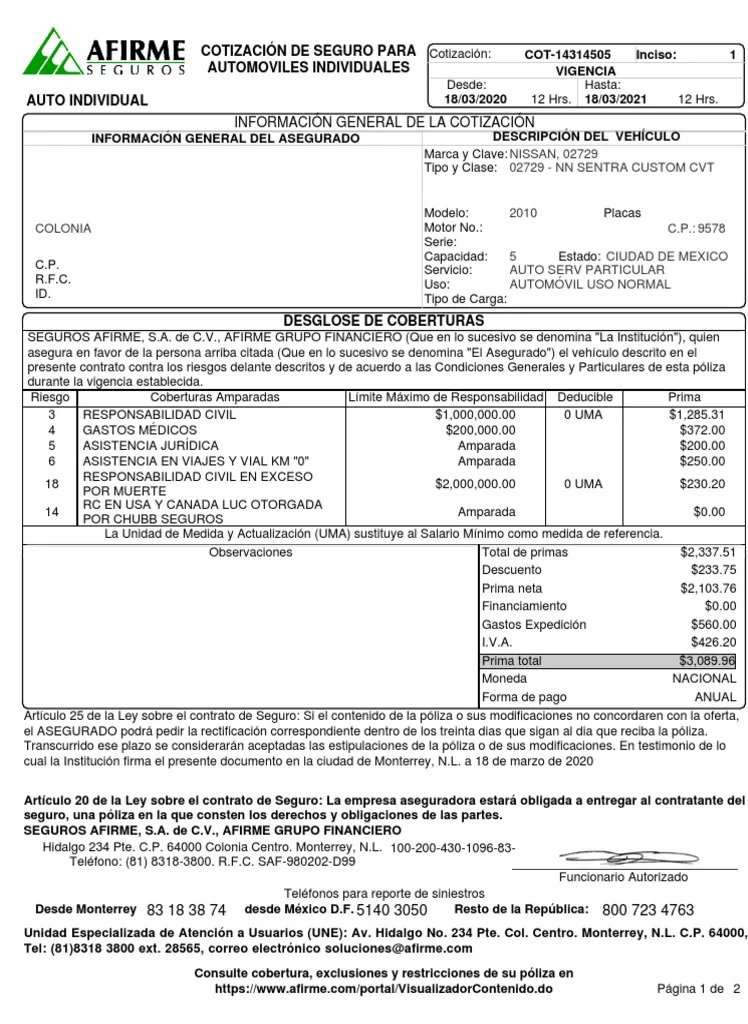

In [7]:
#img.show()
img

In [8]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(748, 1024)
RGB


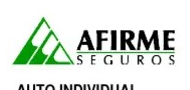

In [9]:
cropped_img = img.crop((10, 10, 200, 100))
cropped_img.size
#cropped_img.show()
cropped_img

In [10]:
low_res_img = cropped_img.resize((cropped_img.width // 4, cropped_img.height // 4))
#low_res_img.show()
low_res_img

In [11]:
low_res_img = cropped_img.reduce(4)
low_res_img

## Manipulacion basica de imagenes.

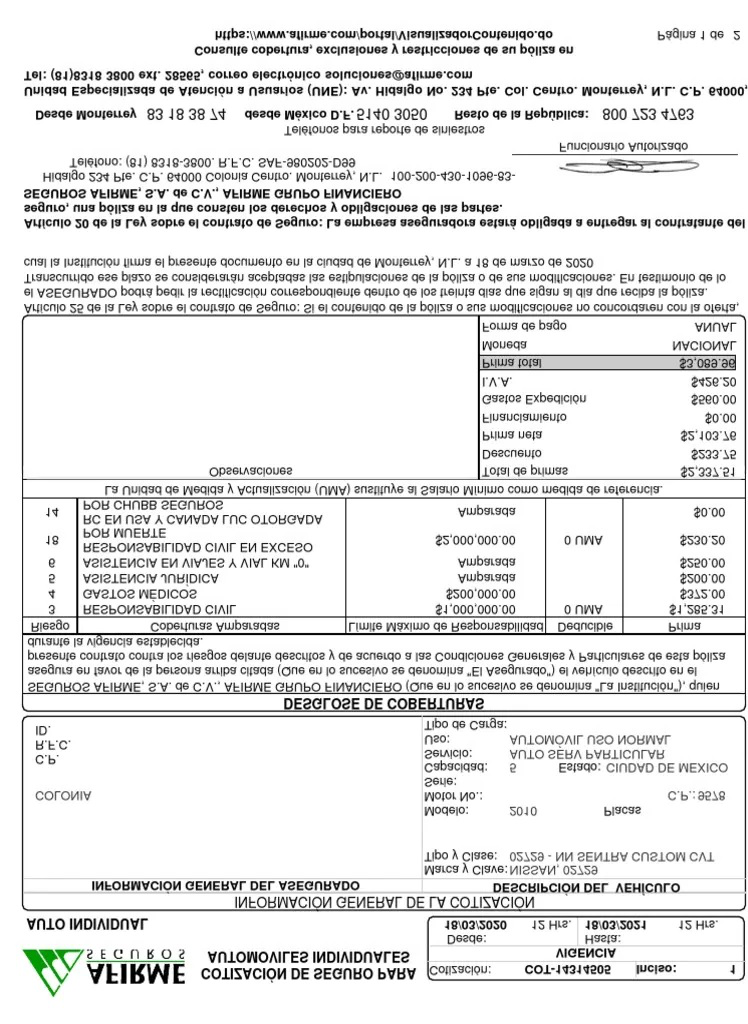

In [12]:
converted_img = img.transpose(Image.FLIP_TOP_BOTTOM)
#converted_img.show()
converted_img

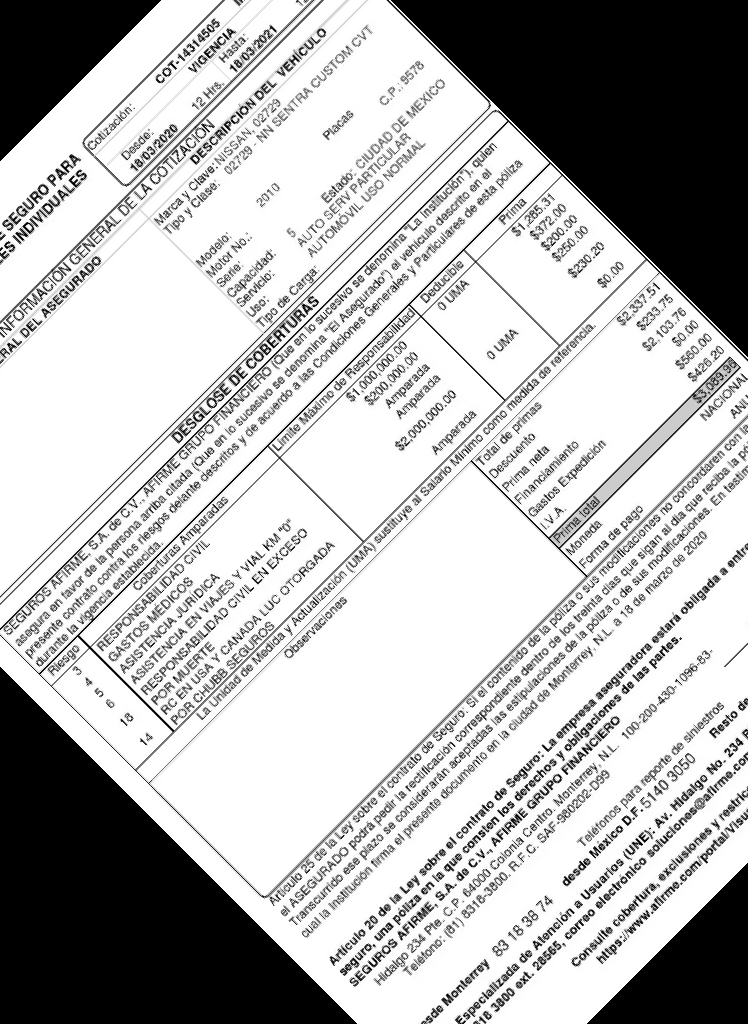

In [13]:
rotated_img = img.rotate(45)
rotated_img

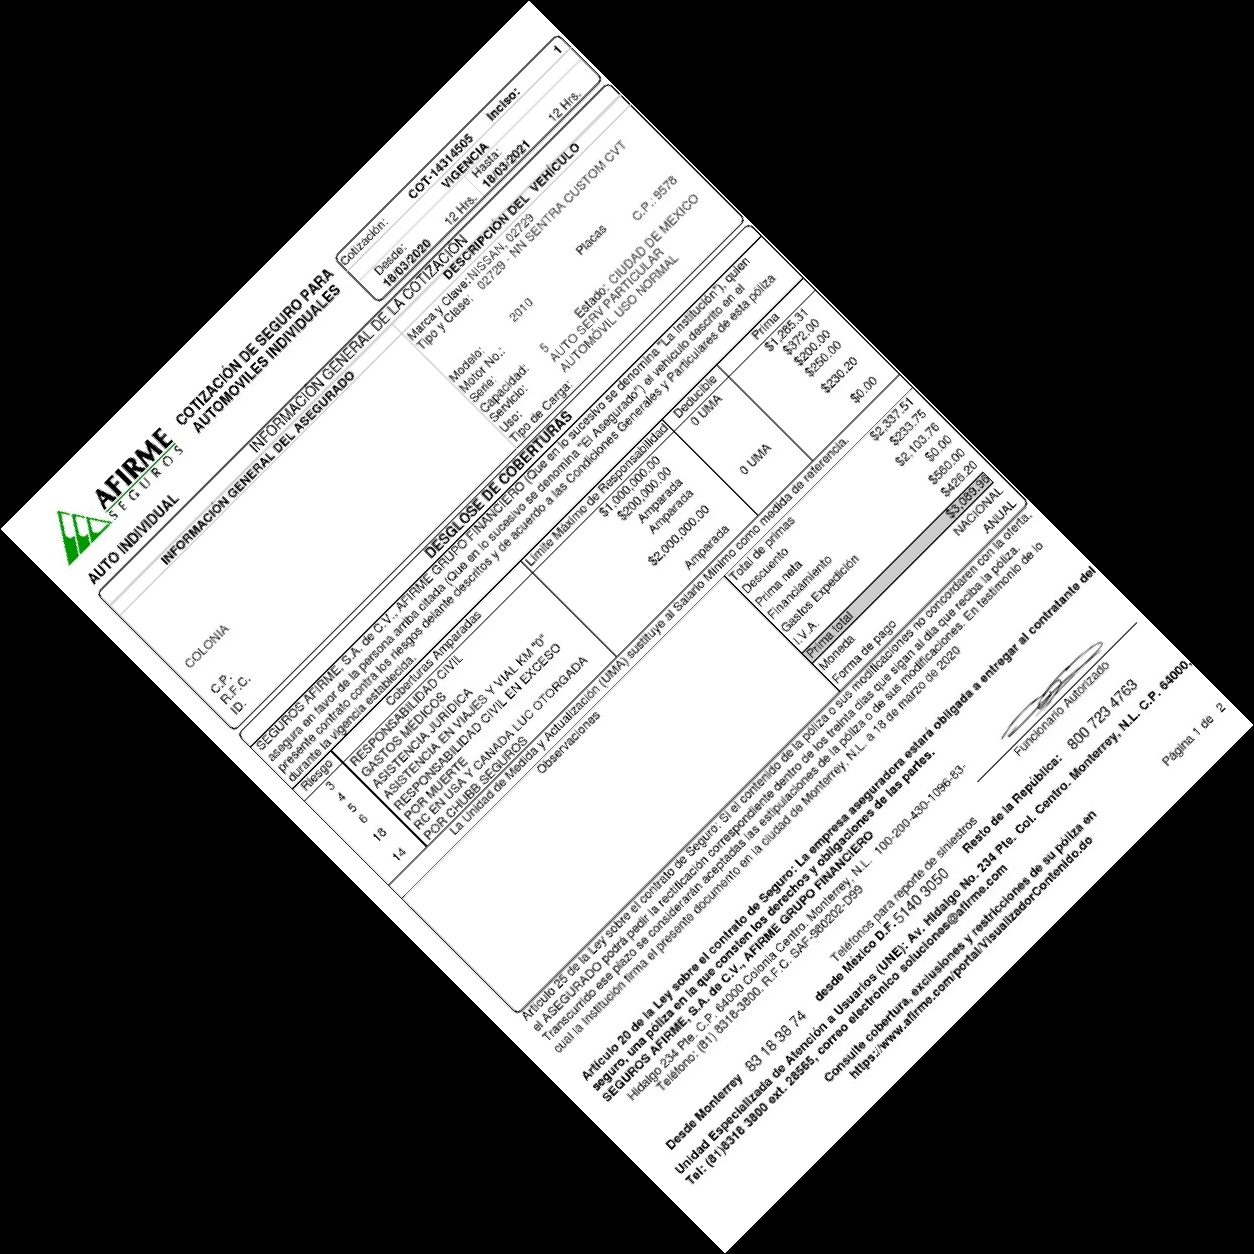

In [14]:
rotated_img = img.rotate(45, expand=True)
rotated_img

## Diferentes modos de imagen

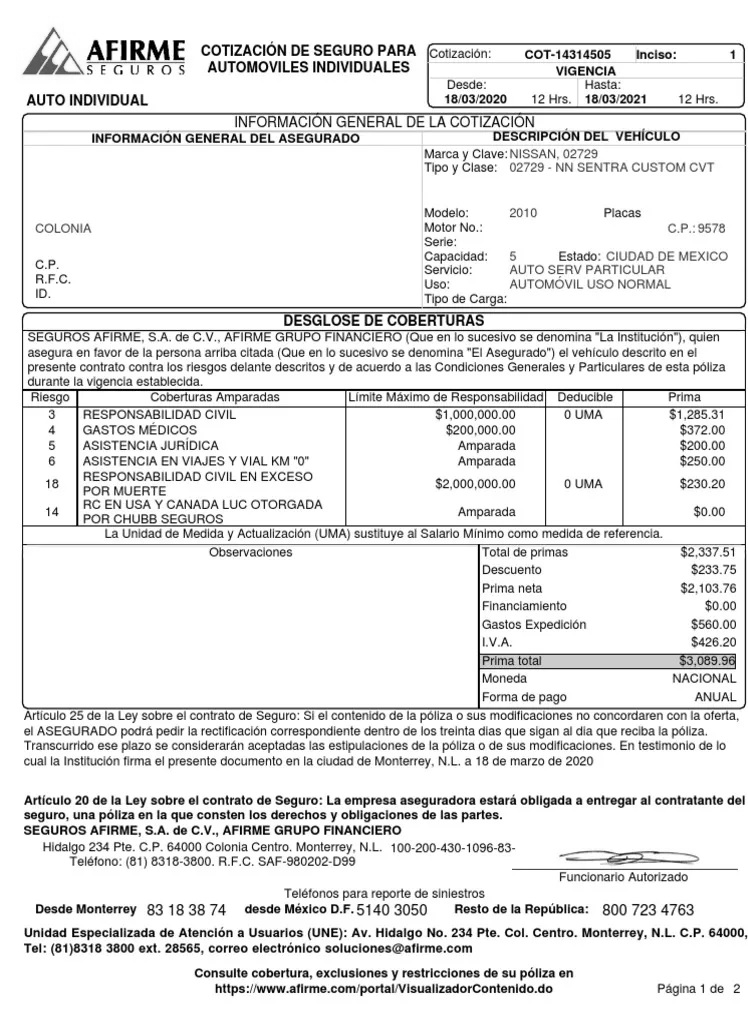

In [15]:
cmyk_img = img.convert("CMYK")
gray_img = img.convert("L")  # Grayscale

#cmyk_img
gray_img

In [16]:
print(img.getbands())
print(cmyk_img.getbands())
print(gray_img.getbands())

('R', 'G', 'B')
('C', 'M', 'Y', 'K')
('L',)


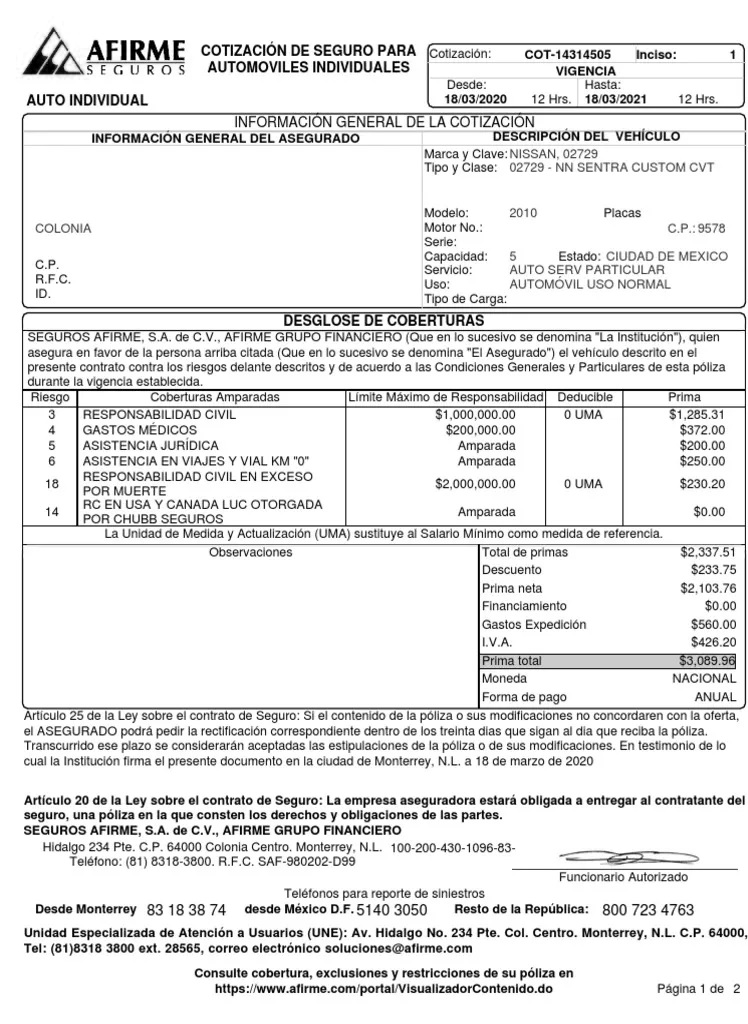

In [17]:
red, green, blue = img.split()
red

In [18]:
red.mode

'L'

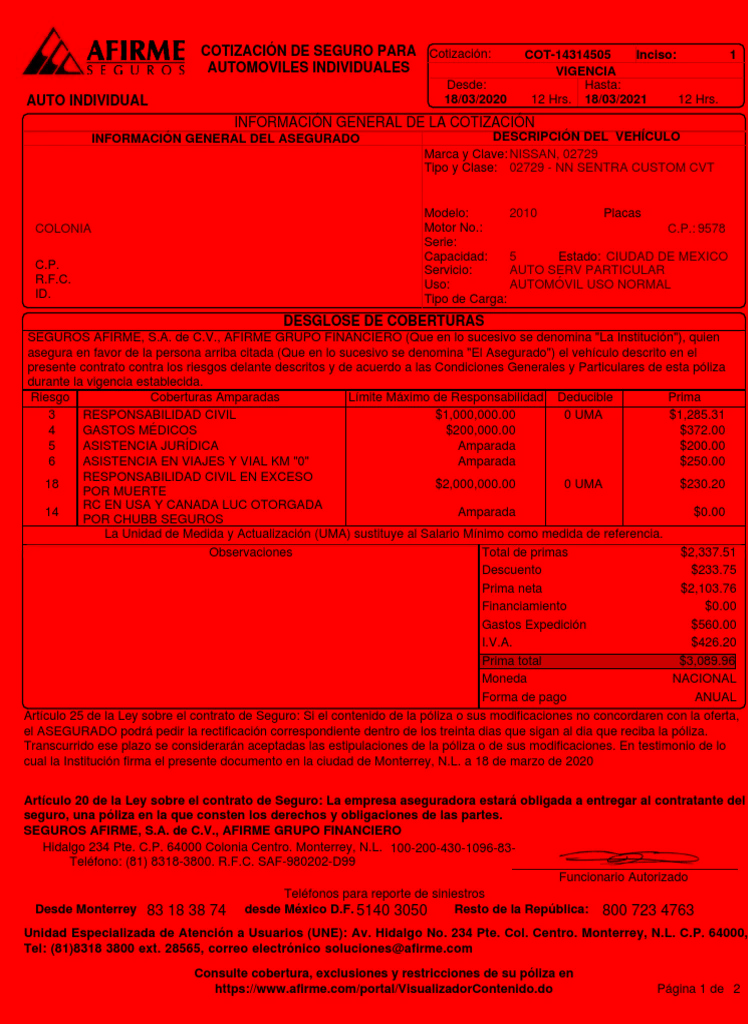

In [19]:
zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))
green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))
blue_merge = Image.merge( "RGB", (zeroed_band, zeroed_band, blue))

red_merge

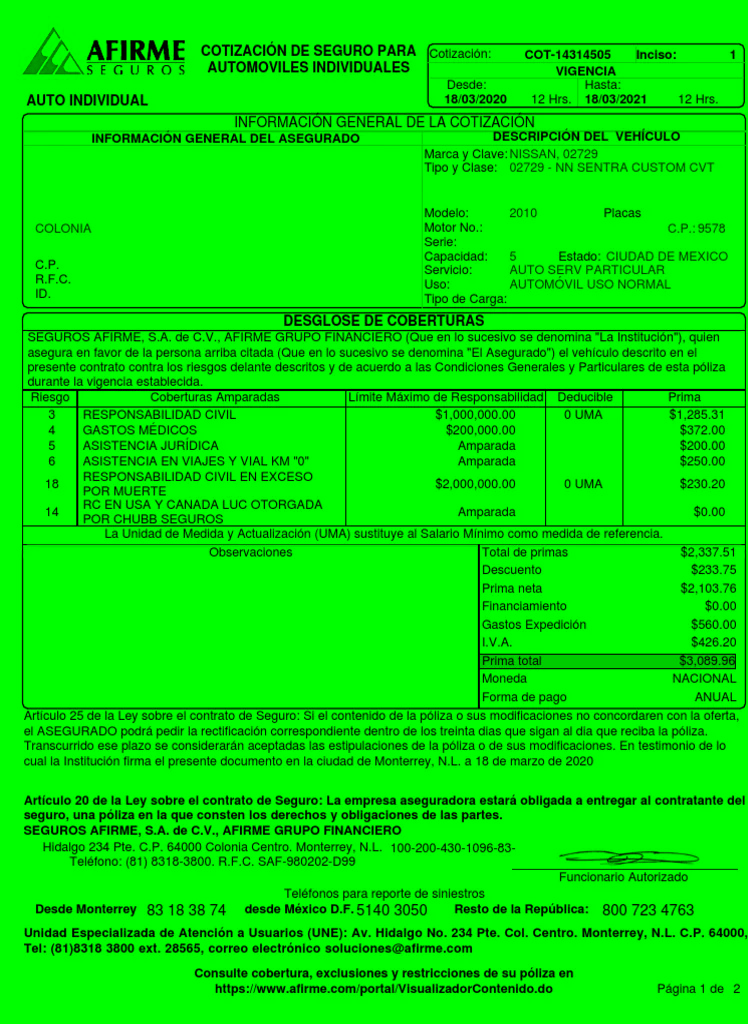

In [20]:
green_merge

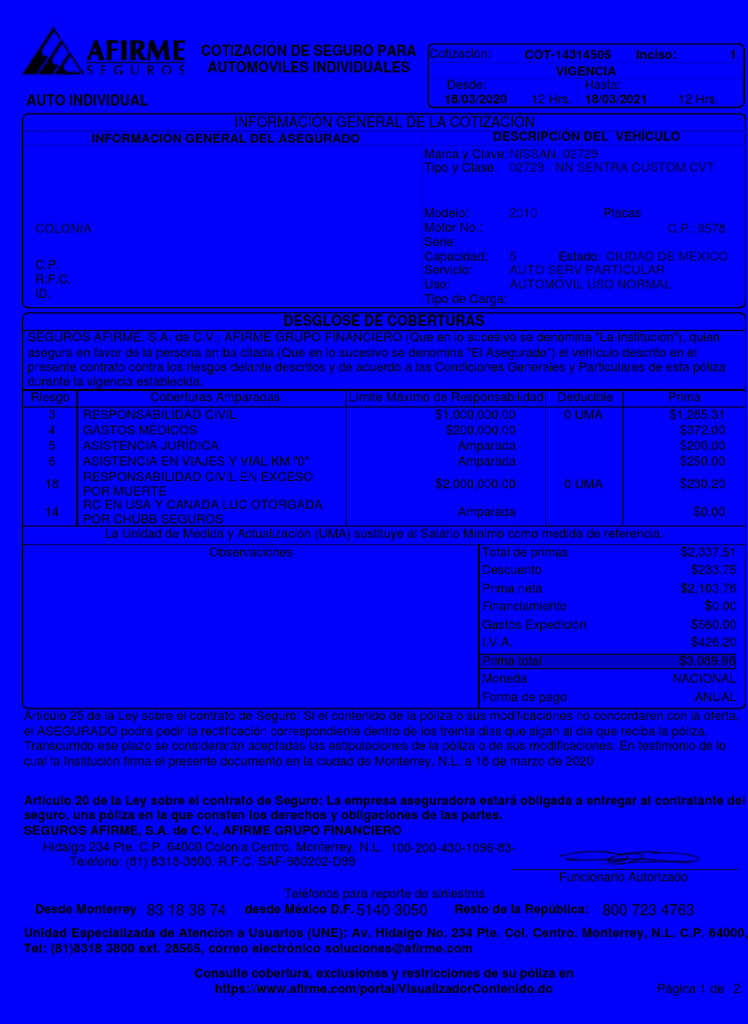

In [21]:
blue_merge

## Procesamiento de imagenes usando Pillow

### Blurring, sharpening, smoothing.

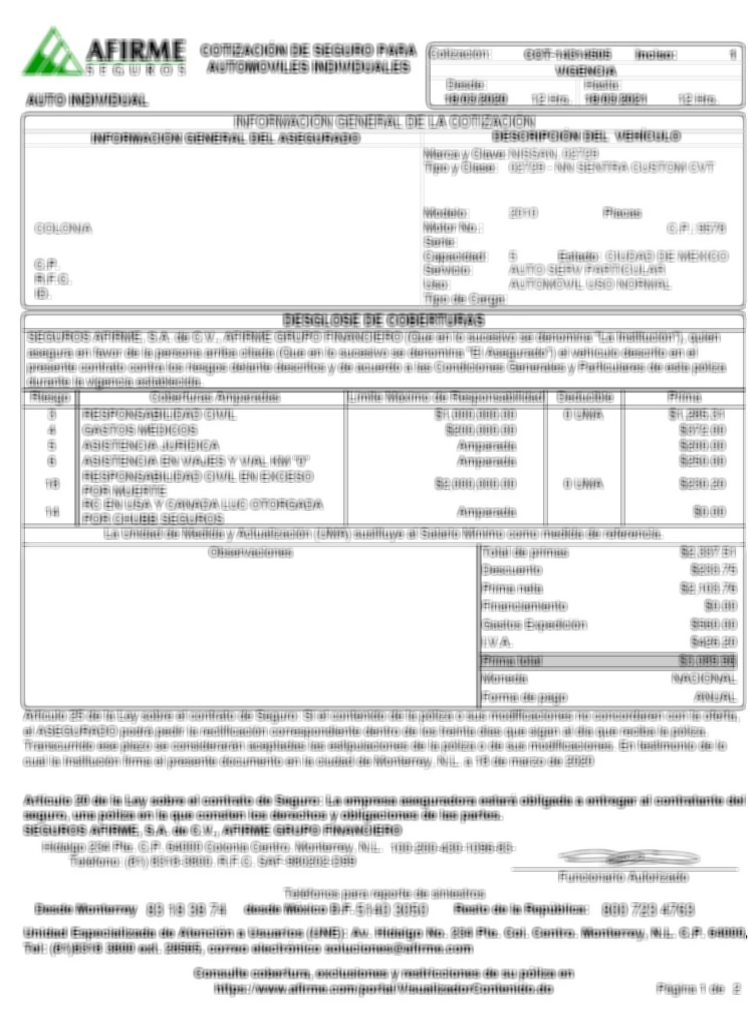

In [22]:
from PIL import Image, ImageFilter
blur_img = img.filter(ImageFilter.BLUR)
blur_img

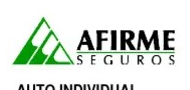

In [23]:
img.crop((10, 10, 200, 100))

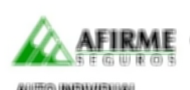

In [24]:
blur_img.crop((10, 10, 200, 100))

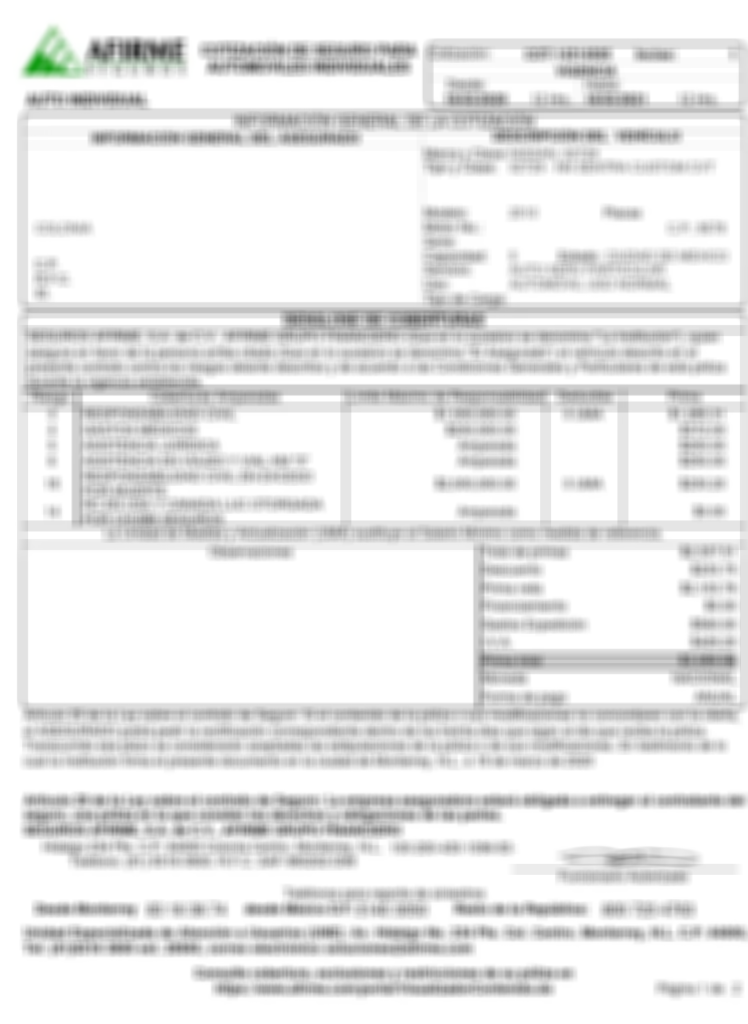

In [25]:
img.filter(ImageFilter.BoxBlur(5))

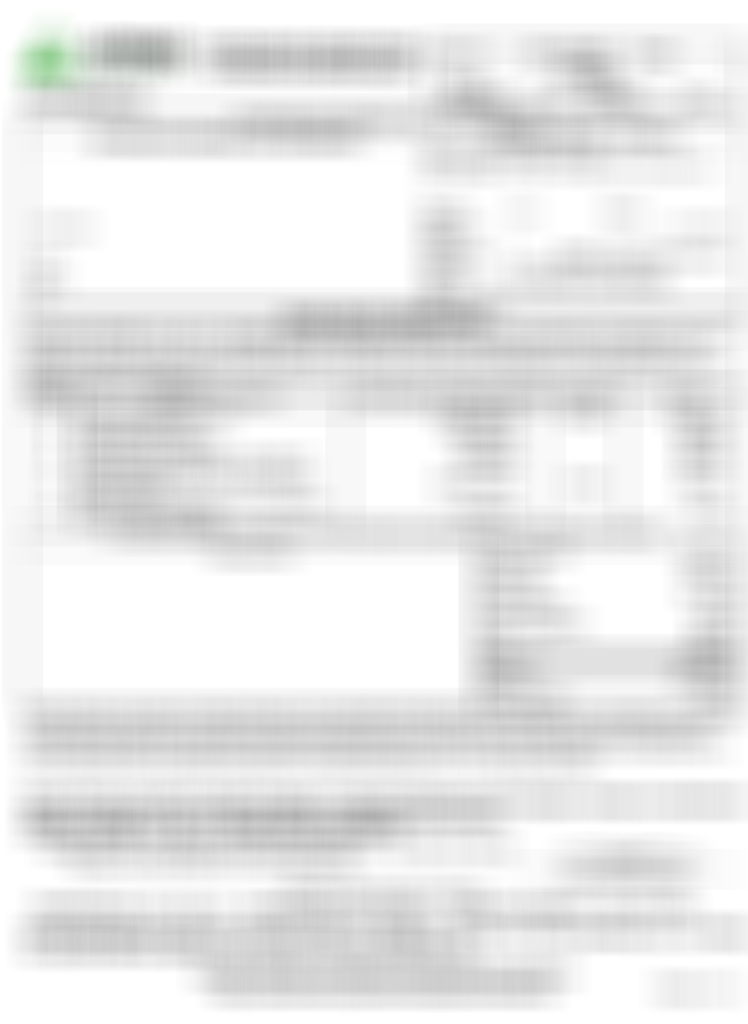

In [26]:
img.filter(ImageFilter.BoxBlur(20))

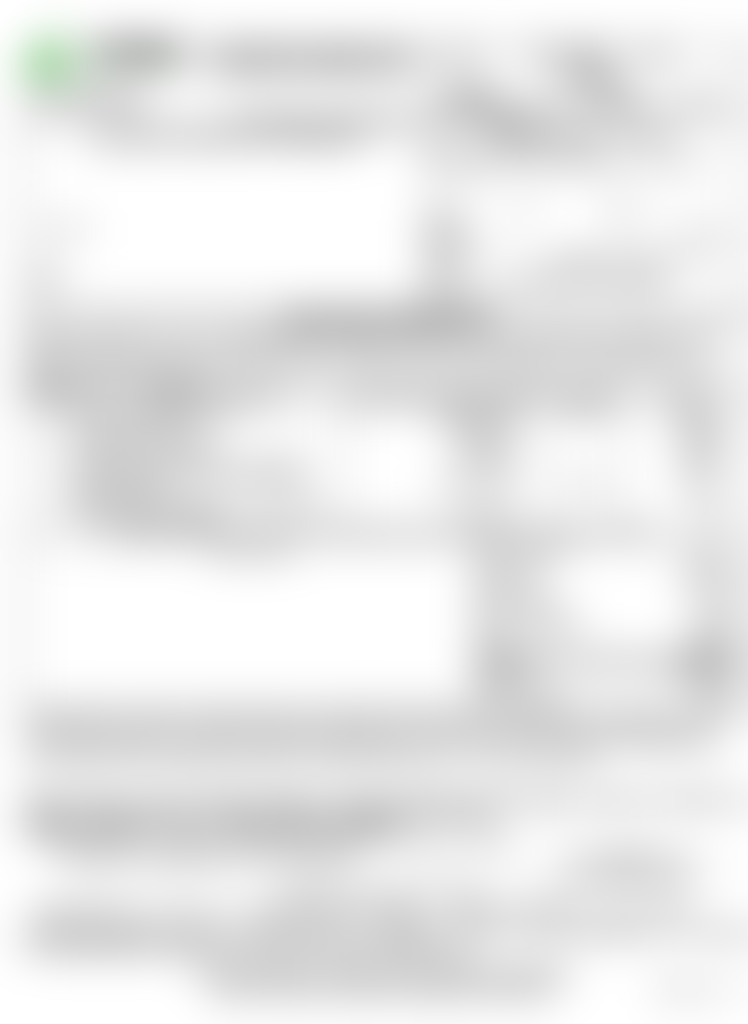

In [27]:
img.filter(ImageFilter.GaussianBlur(20))

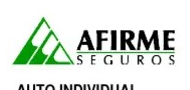

In [28]:
sharp_img = img.filter(ImageFilter.SHARPEN)
img.crop((10, 10, 200, 100))

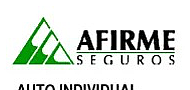

In [29]:
sharp_img.crop((10, 10, 200, 100))

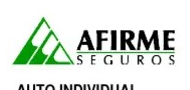

In [30]:
smooth_img = img.filter(ImageFilter.SMOOTH)
img.crop((10, 10, 200, 100))

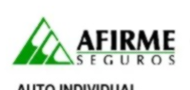

In [31]:

smooth_img.crop((10, 10, 200, 100))

### Deteccion de bordes, mejora de bordes y embossing.


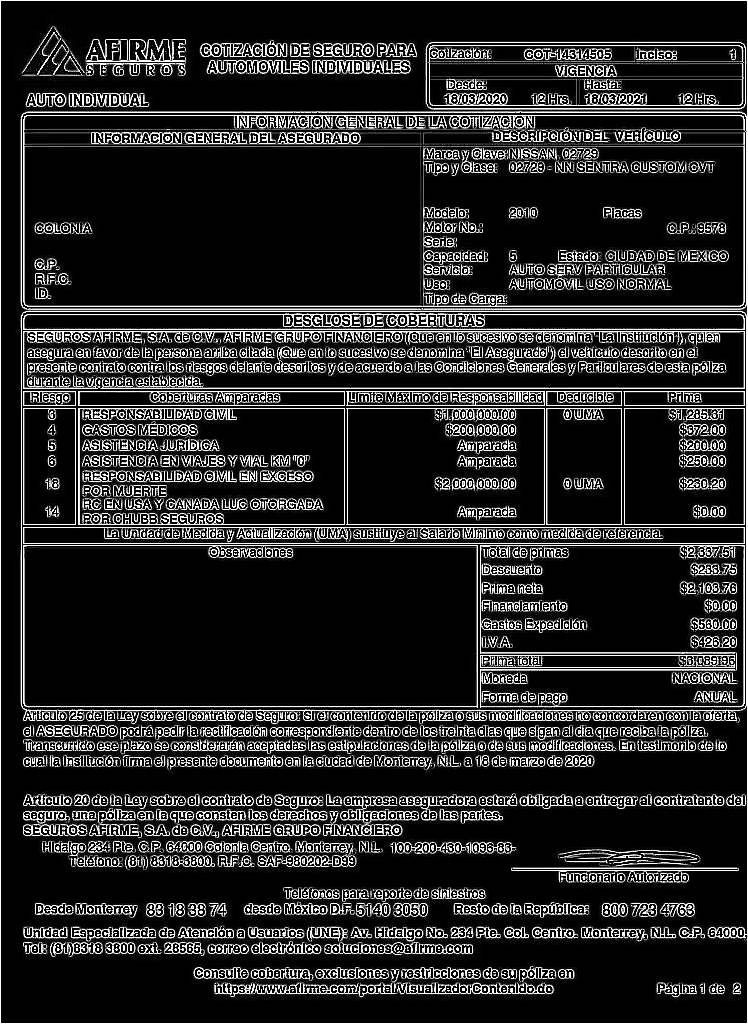

In [32]:
img_gray = img.convert("L")
edges = img_gray.filter(ImageFilter.FIND_EDGES)
edges

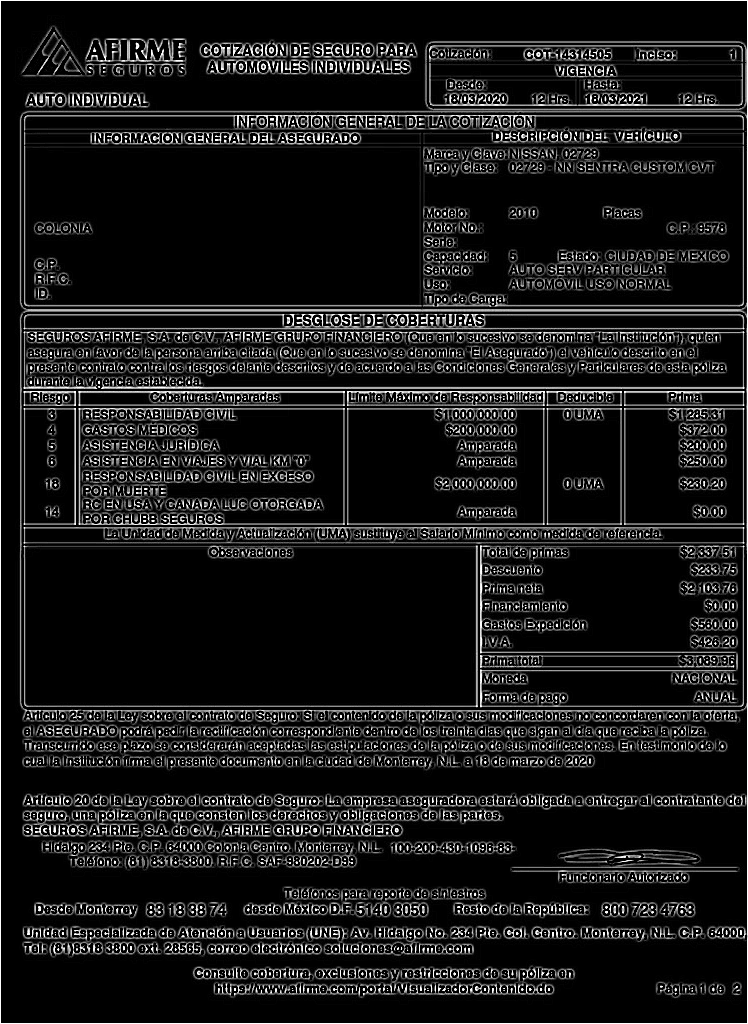

In [33]:
img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)
edges_smooth

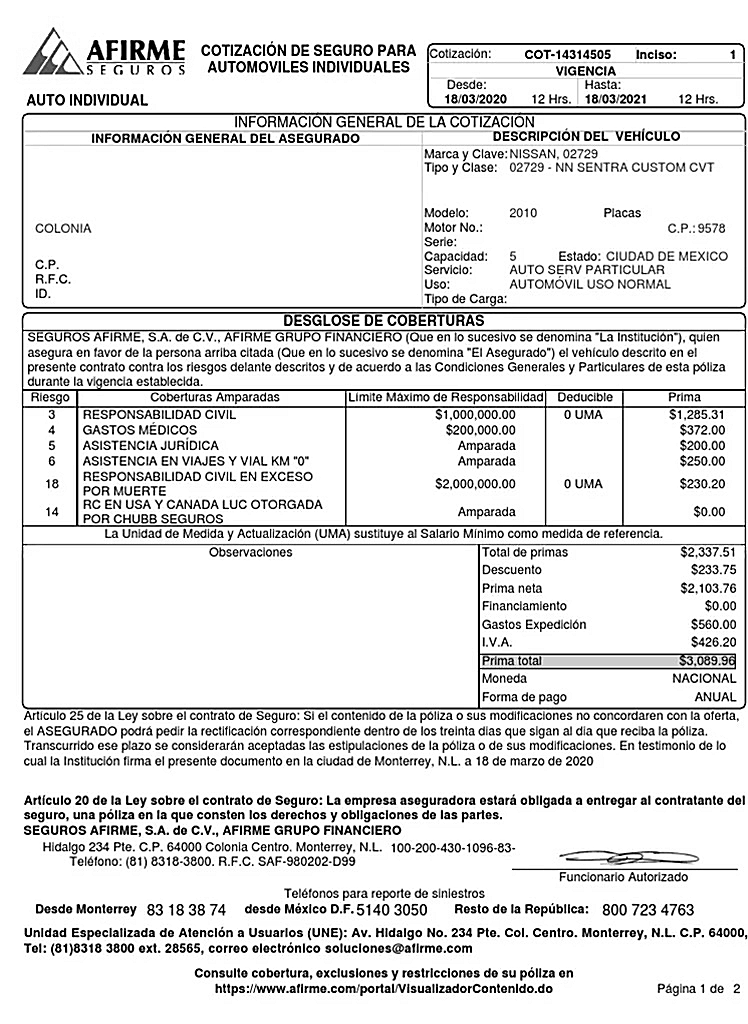

In [34]:
edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
edge_enhance

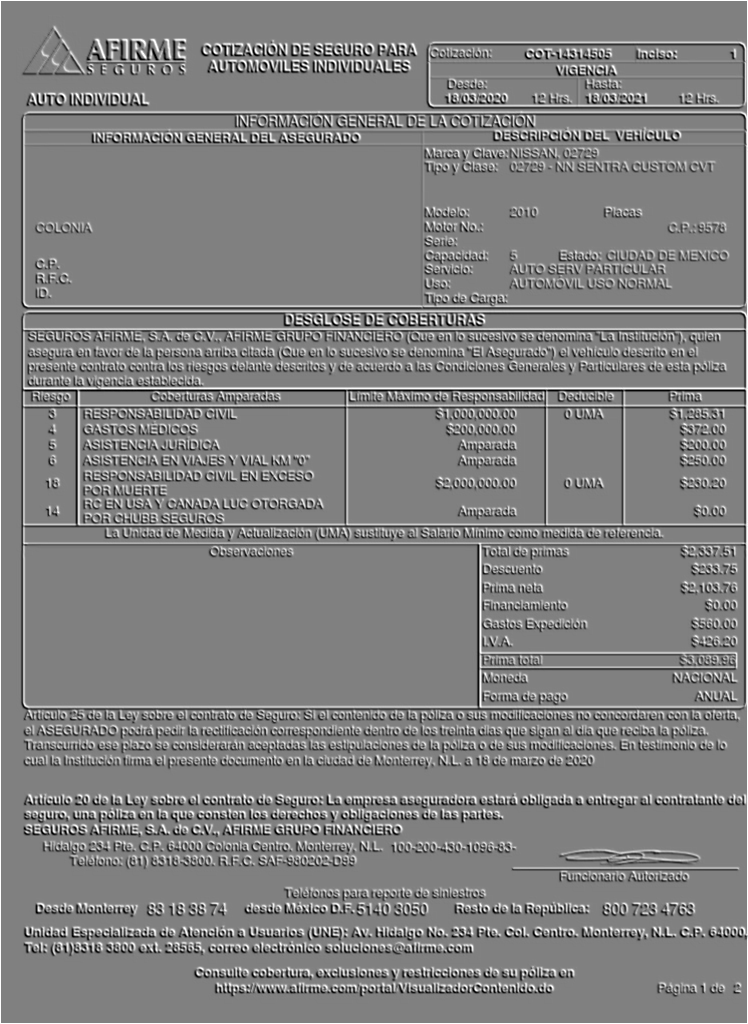

In [35]:
emboss = img_gray_smooth.filter(ImageFilter.EMBOSS)
emboss

## Segmentacion de imagenes y superposicion.

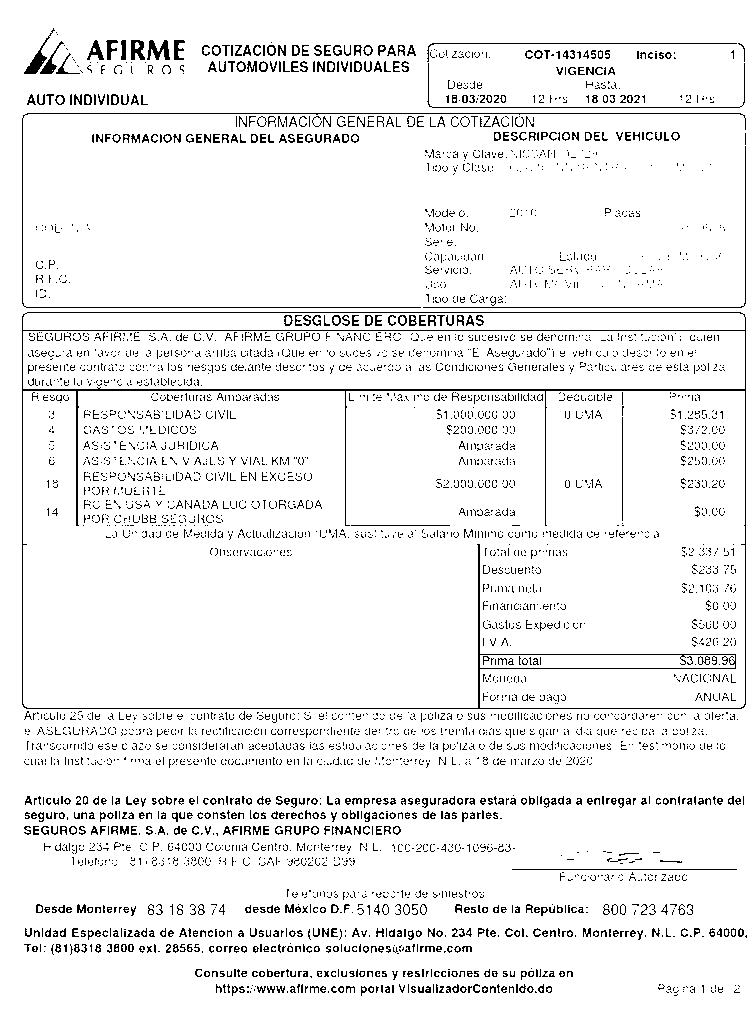

In [47]:
threshold = 100
img_gray_threshold = img_gray.point(
    lambda x: 255 if x > threshold else 0
)
img_gray_threshold

## Conclusión

Para el proyecto que se quiere realizar estas herramientas de cortado, difuminado, el contraste pueden ayudar mucho al momento de realizar la prueba si en verdad es una cotizacion de seguros. Lo ideal seria con un barrido la imagen, tratando de identificar si en la cotizacion se presenta el logo de alguna de las aseguradoras. Si este paso sucede, ya el proximo seria validar que no sea de la propia compañia o si pertenece a otra aseguradora, mediante algun patron conocer si corresponde a una cotizacion de seguro de auto ya que puede ser de cualquiera de las 3 operaciones que tiene seguro: vida, gastos medicos o daños (autos).